<h2>Sections</h2>
<h3>Data Processing</h3>
<ul>
    <li><a href="#pca-visualization">Visualization</a></li>
    <li><a href="#preprocessing">Preprocessing</a></li>
    <li><a href="#feature-engineering">Feature Engineering</a></li>
</ul>
<h3>Training</h3>
<ul>
    <li><a href="#logistic-regression">Logistic Regression</a></li>
    <li><a href="#random-forest">Random Forest</a></li>
    <li><a href="#support-vector-machine">Support Vector Machine</a></li>
    <li><a href="#neural-network">Neural Network</a></li>
    <li><a href="#adaboost">Customized AdaBoost</a></li>
    <li><a href="#sklearn-adaboost">Sklearn-AdaBoost</a></li>
</ul>


In [1087]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [1088]:
df = pd.read_csv("Cancer_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [1089]:
df = df.drop(labels=["Unnamed: 32", "id"], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# PCA Visualization

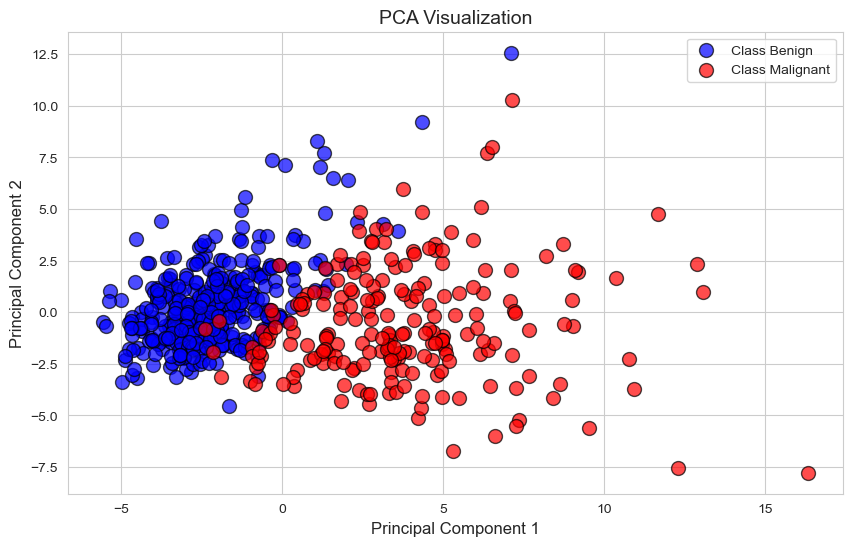

In [1090]:
def PCA_visualization(data, n_principal_comp=2):
    x_vis = np.array(data.drop(columns=["diagnosis"]))
    y_vis = np.array(data["diagnosis"])
    y_vis = np.where(y_vis == "M", "Malignant", "Benign")

    vis_scaler = StandardScaler()
    x_vis_scaled = vis_scaler.fit_transform(x_vis)

    pca = PCA(n_components=n_principal_comp)
    x_vis_scaled_pca = pca.fit_transform(x_vis_scaled)

    unique_labels = ["Benign", "Malignant"]
    colors = ["blue", "red"]
    label_map = {unique_labels[i]: colors[i] for i in range(len(unique_labels))}

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    for label in unique_labels:
        plt.scatter(
            x_vis_scaled_pca[y_vis == label, 0], 
            x_vis_scaled_pca[y_vis == label, 1], 
            c=label_map[label],
            label=f"Class {label}",
            alpha=0.7, 
            s=100, 
            edgecolors="black"
        )

    plt.title("PCA Visualization", fontsize=14)
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.legend()
    plt.show()

PCA_visualization(df)

# Preprocessing

62 row(s) of data deleted!


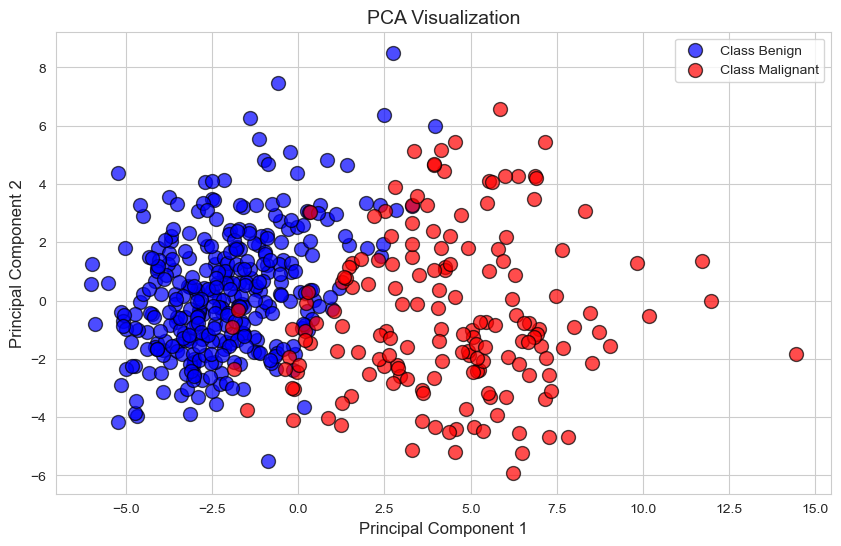

In [1091]:
numeric_df = df.select_dtypes(include=["number"])
Q1 = numeric_df.quantile(0.2)
Q3 = numeric_df.quantile(0.8)
IQR = Q3 - Q1
filtered_df = df[~(((numeric_df < Q1 - 2 * IQR) | (numeric_df > Q3 + 2 * IQR))).any(axis=1)]
diff = len(df) - len(filtered_df)
df = filtered_df
print(f"{diff} row(s) of data deleted!")
PCA_visualization(df)

In [1092]:
encoder = LabelEncoder()
df["diagnosis"] = encoder.fit_transform(df["diagnosis"])
df

C:\Users\pc\AppData\Local\Temp\ipykernel_3860\2472254715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diagnosis"] = encoder.fit_transform(df["diagnosis"])


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820


# Feature Engineering

In [1093]:
correlation_matrix = df.corr()

threshold = 0.95
high_corr_pairs = [
    [col1, col2]
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold and col1 != "diagnosis" and col2 != "diagnosis"
]

unique_list = []  
for item in high_corr_pairs:
    if item not in unique_list:
        unique_list.append(sorted(item))

seen = set()
unique_sub_lists = []

for sub_list in unique_list:
    if not any(element in seen for element in sub_list):
        unique_sub_lists.append(sub_list)
        seen.update(sub_list)

unique_list = np.array(unique_sub_lists)

print(f"The {len(unique_list)} relation of features:")
print("\n".join(map(str, unique_list)))

The 4 relation of features:
['perimeter_mean' 'radius_mean']
['area_mean' 'radius_worst']
['perimeter_se' 'radius_se']
['area_worst' 'perimeter_worst']


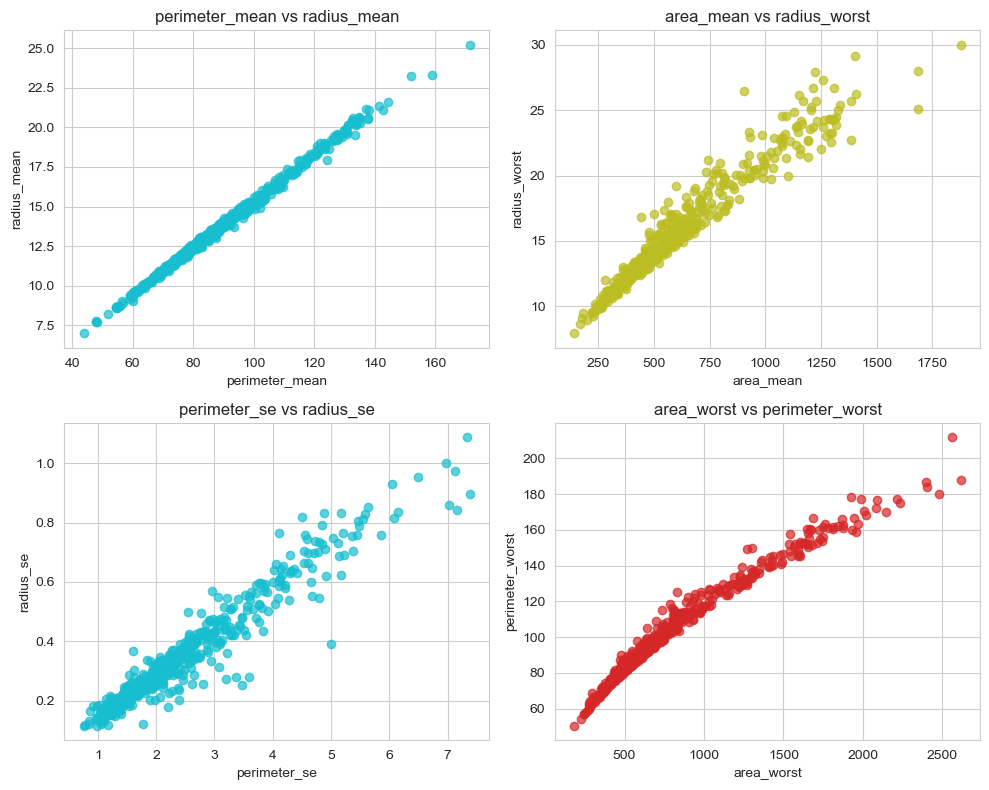

In [1094]:
rows, cols = 2, len(unique_list) // 2

fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
axes = axes.flatten()
colors = list(mcolors.TABLEAU_COLORS)

for i, (x_feat, y_feat) in enumerate(unique_list):
    ax = axes[i]
    ax.scatter(df[x_feat], df[y_feat], alpha=0.7, color=colors[np.random.randint(0, len(colors))])
    ax.set_title(f'{x_feat} vs {y_feat}')
    ax.set_xlabel(x_feat)
    ax.set_ylabel(y_feat)
    ax.grid(True)

for j in range(len(unique_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [1095]:
dfc = df.copy()
for sub_list in unique_list:
    combined_name = f"combined-{sub_list[0]}-{sub_list[1]}"
    dfc[combined_name] = (dfc[sub_list[0]] / (dfc[sub_list[1]]+1e-10))
    dfc = dfc.drop(columns=sub_list)
dfc

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,combined-perimeter_mean-radius_mean,combined-area_mean-radius_worst,combined-perimeter_se-radius_se,combined-area_worst-perimeter_worst
1,1,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,74.08,...,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902,6.460865,53.061224,6.252070,12.317380
2,1,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,94.03,...,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758,6.602336,51.039457,6.149410,11.206557
4,1,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,94.44,...,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678,6.658452,57.542147,7.181722,10.348226
5,1,15.70,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.8902,27.19,...,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440,6.632129,30.840336,6.627803,7.172147
6,1,19.98,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.7732,53.91,...,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368,6.553425,45.454545,7.118872,10.483029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,23.93,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,2.9040,16.97,...,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,6.474370,32.331731,8.107203,5.763247
560,0,27.15,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,1.4920,29.84,...,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,6.503915,39.241830,7.923182,7.052894
565,1,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,99.04,...,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,6.517635,53.229211,6.796865,11.167742
566,1,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,48.55,...,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,6.524096,45.210748,7.504382,8.871350


In [1096]:
dfc.dropna(axis=0, how="any", inplace=True)
y = dfc["diagnosis"]
dfc = dfc.drop("diagnosis", axis=1)

In [1097]:
X = dfc.values
feature_x_train, feature_x_test, feature_y_train, feature_y_test = train_test_split(X, y, test_size=0.2)
feature_y_train

437    0
106    0
194    1
135    1
355    0
      ..
162    1
346    0
377    0
167    1
273    0
Name: diagnosis, Length: 405, dtype: int32

In [1098]:
importanceFeaturesChecker = RandomForestClassifier()
importanceFeaturesChecker.fit(feature_x_train, feature_y_train)

importance = importanceFeaturesChecker.feature_importances_
importance

array([0.015517  , 0.00697361, 0.01796437, 0.08286039, 0.16948062,
       0.00386909, 0.00970179, 0.00617686, 0.08802399, 0.00757405,
       0.00513336, 0.00956779, 0.00871121, 0.00513524, 0.00370601,
       0.03070642, 0.00803103, 0.01964661, 0.06092182, 0.14326498,
       0.00958053, 0.01036426, 0.05795277, 0.01854739, 0.0082535 ,
       0.1923353 ])

In [1099]:
columns = dfc.columns
importance_features = [columns[i] for i in range(len(importance)) if importance[i] > 0.02]
print(" ,".join(importance_features))
print(f"Just {len(importance_features)} of features are useful for our training.")
print("Unimportance features make our model overfitted.")

concavity_mean ,concave points_mean ,area_se ,texture_worst ,concavity_worst ,concave points_worst ,combined-perimeter_mean-radius_mean ,combined-area_worst-perimeter_worst
Just 8 of features are useful for our training.
Unimportance features make our model overfitted.


In [1100]:
final_df = dfc[importance_features]
x_train, x_test, y_train, y_test = train_test_split(dfc.values, y, test_size=0.2, random_state=50)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)

(405, 26)
(102, 26)


In [1101]:
def predict(model, x_test_data):
    return model.predict(x_test_data)

def nn_predict(model, x):
    nn_pred = model.predict(x)
    nn_pred_res = [0] * len(nn_pred)
    for i in range(len(nn_pred)):
        if nn_pred[i][0] < nn_pred[i][1]:
            nn_pred_res[i] = 1
    return nn_pred_res

In [1102]:
def evaluate_model(model, x_test_data, y_test_data, is_nn=False, prediction=None):
    if prediction is None:
        y_pred = nn_predict(model, x_test_data) if is_nn else predict(model, x_test_data)
    else:
        y_pred = prediction

    accuracy = accuracy_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred)
    recall = recall_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1_Score: {f1}")

    colors = ['Blues', 'Greens', 'Reds', 'Oranges', 'Purples']
    random_cmap = random.choice(colors)

    cm = confusion_matrix(y_test_data, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap=random_cmap, xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])  
    plt.xlabel("Predicted")  
    plt.ylabel("True")  
    plt.show()

# Logistic Regression

Accuracy: 0.9803921568627451
Precision: 0.96875
Recall: 0.96875
F1_Score: 0.96875


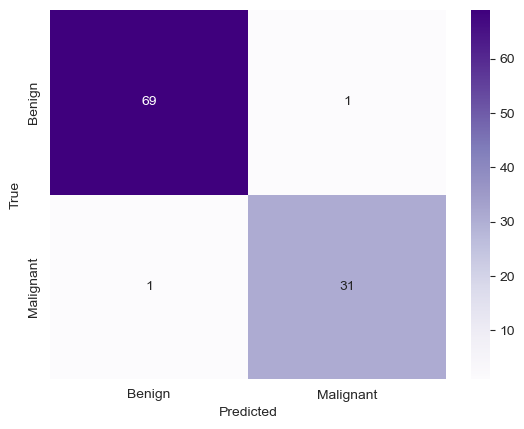

In [1103]:
lr = LogisticRegression(C=0.9, solver="newton-cg")
lr.fit(x_train_scaled, y_train)
evaluate_model(lr, x_test_scaled, y_test)

# Random Forest

Accuracy: 0.9705882352941176
Precision: 1.0
Recall: 0.90625
F1_Score: 0.9508196721311475


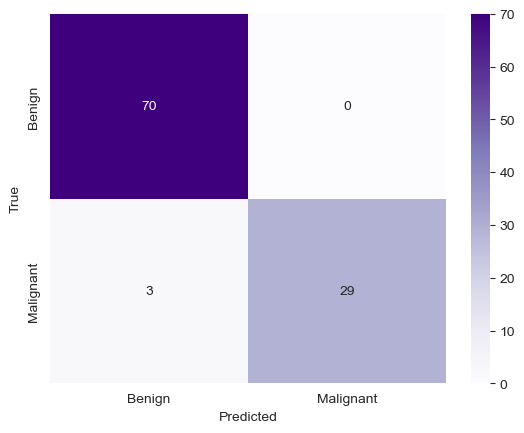

In [1104]:
rf = RandomForestClassifier(n_estimators=25, max_depth=15)
rf.fit(x_train_scaled, y_train)
evaluate_model(rf, x_test_scaled, y_test)

# Support Vector Machine

Accuracy: 0.9803921568627451
Precision: 0.96875
Recall: 0.96875
F1_Score: 0.96875


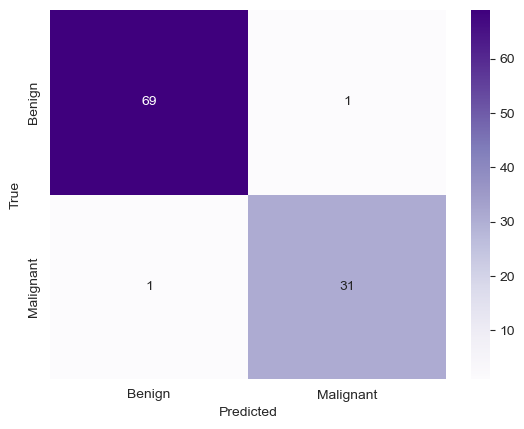

In [1105]:
svm = SVC(C=0.9, kernel="linear")
svm.fit(x_train_scaled, y_train)
evaluate_model(svm, x_test_scaled, y_test)

# Neural Network

In [1106]:
nn = Sequential([
    Input(shape=(x_train_scaled.shape[1],)),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(16, activation="relu"),
    BatchNormalization(),
    Dropout(0.1),

    Dense(2, activation="softmax")
])

nn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [1107]:
earlyStopping = EarlyStopping(patience=4, monitor="val_loss", restore_best_weights=True)
modelCheckpoint = ModelCheckpoint(filepath="best_model.keras", monitor="val_loss", save_best_only=True, verbose=1)
lr_reduce = ReduceLROnPlateau(factor=0.5, monitor="val_loss", patience=2, verbose=1, min_lr=0.00001)

callbacks = [earlyStopping, modelCheckpoint, lr_reduce]

In [1108]:
x_train_nn, x_validation_nn, y_train_nn, y_validation_nn = train_test_split(
    x_train_scaled,
    y_train,
    test_size=0.3,
    random_state=42,
    shuffle=True
)
print(x_train_nn.shape)
print(x_validation_nn.shape)

(283, 26)
(122, 26)


In [1109]:
EPC = 30
BATCH_SIZE = 16
res = nn.fit(
    x_train_nn,
    y_train_nn,
    epochs=EPC,
    validation_data=(x_validation_nn, y_validation_nn),
    batch_size=BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/30
 1/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.3750 - loss: 1.0113
Epoch 1: val_loss improved from inf to 0.71704, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5560 - loss: 0.8536 - val_accuracy: 0.5164 - val_loss: 0.7170 - learning_rate: 0.0010
Epoch 2/30
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7500 - loss: 0.7376
Epoch 2: val_loss improved from 0.71704 to 0.52034, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 0.4803 - val_accuracy: 0.8115 - val_loss: 0.5203 - learning_rate: 0.0010
Epoch 3/30
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8125 - loss: 0.3481
Epoch 3: val_loss improved from 0.52034 to 0.40014, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9231 - loss: 0.2882 - val_accuracy: 0.8934 - val_loss: 0.4001 - learning_rate: 0.0010
Epoch 4/30
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8750 - loss:

In [1110]:
nn.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,664 (18.22 KB)

 Trainable params: 1,522 (5.95 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 3,046 (11.90 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy: 0.9705882352941176
Precision: 0.967741935483871
Recall: 0.9375
F1_Score: 0.9523809523809523


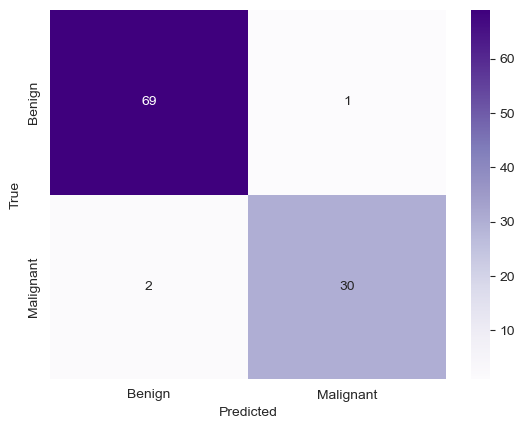

In [1111]:
evaluate_model(nn, x_test_scaled, y_test, is_nn=True)

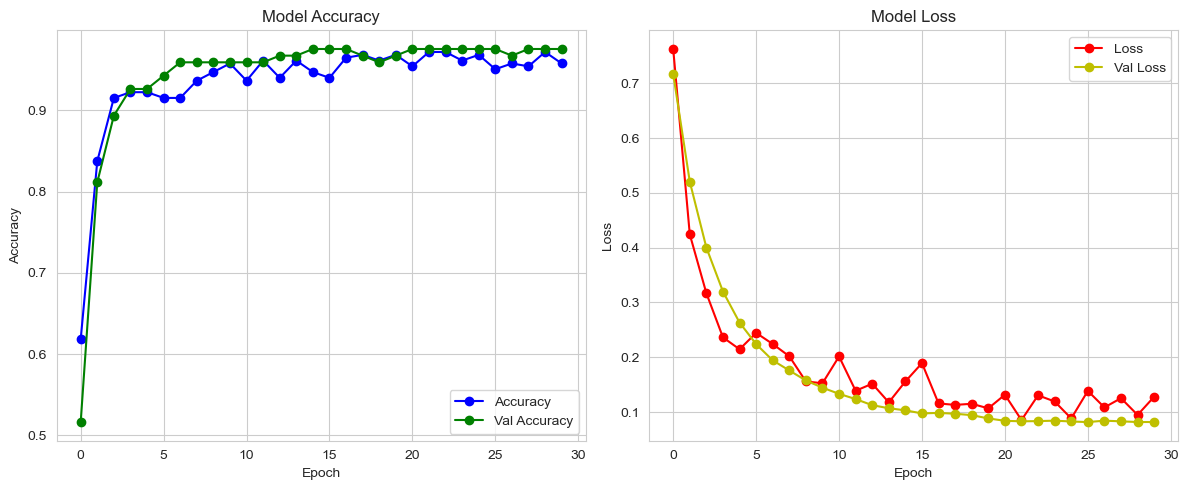

In [1112]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(res.history["accuracy"], "-ob", label="Accuracy")
ax[0].plot(res.history["val_accuracy"], "-og", label="Val Accuracy")
ax[0].set_title("Model Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(res.history["loss"], "-or", label="Loss")
ax[1].plot(res.history["val_loss"], "-oy", label="Val Loss")
ax[1].set_title("Model Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.tight_layout()
plt.show()

# AdaBoost

In [1113]:
def decision_stump(x, y, weights):
    n_sample, n_feature = x.shape

    best_feature = None
    best_threshold = None
    min_error = float('inf')
    best_polarity = None

    for feature in range(n_feature):
        thresholds = np.unique(x[:, feature])
        for threshold in thresholds:
            for polarity in [1, -1]:
                predictions = polarity * (x[:, feature] > threshold)
                predictions = np.where(predictions, 1, -1)
                error = np.sum(weights[y != predictions])

                if error < min_error:
                    min_error = error
                    best_feature = feature
                    best_threshold = threshold
                    best_polarity = polarity
    
    return best_feature, best_threshold, best_polarity, min_error

In [1114]:
x_train_scaled.shape

(405, 26)

In [1115]:
ada_y_train = y_train
ada_y_train = np.where(ada_y_train == 0, -1, 1)

In [1116]:
n_sample, n_feature = x_train_scaled.shape
n_model = 100
weak_learners = []
weights = np.full(n_sample, 1/n_sample)

print(weights.shape, x_train_scaled.shape, y_train.shape)

for i in range(n_model):
    feature, threshold, polarity, error = decision_stump(x_train_scaled, ada_y_train, weights)
    alpha = 0.5 * np.log((1 - error) / max(error, 1e-10))

    predictions = polarity * (x_train_scaled[:, feature] > threshold)
    predictions = np.where(predictions, 1, -1)
    weights *= np.exp(-alpha * ada_y_train * predictions)
    weights /= np.sum(weights)

    weak_learners.append((feature, threshold, polarity, alpha))

print(weak_learners)

(405,) (405, 26) (405,)
[(4, 0.2141891311706321, 1, 1.339719833530472), (25, 0.23389806826111995, 1, 1.0634745470700724), (15, -0.39515637801854425, 1, 0.7050225622312539), (18, 0.40217236725875255, 1, 0.5085106394903991), (25, -0.14865468152609893, 1, 0.48913115422940284), (8, 0.061197013573748155, 1, 0.4338652440123154), (21, -0.8956907867492436, 1, 0.44968396379284065), (15, 1.0111380187079881, 1, 0.46018652024555046), (8, -0.5508267027035813, 1, 0.3842354943869366), (16, 0.4120498420641934, 1, 0.367542352318429), (8, 0.543020018049466, 1, 0.41043712022666995), (15, -0.9197668027901744, 1, 0.493779848784232), (19, 0.6431735200054459, 1, 0.3893987174202209), (25, -0.45765775741509374, 1, 0.4128203896651973), (7, 1.8951162168867284, 1, 0.3561270152405296), (18, -0.21061198808773943, 1, 0.4270418243913817), (8, 0.061197013573748155, 1, 0.2847005232756444), (15, -0.9197668027901744, 1, 0.2888389126246803), (15, 1.3005198981787902, 1, 0.3410135221364807), (1, -0.46567469410968804, 1, 0.2

In [1117]:
def ada_predict(x, weak_learners):
    final_prediction = np.zeros(x.shape[0])
    for feature, threshold, polarity, alpha in weak_learners:
        prediction = polarity * (x[:, feature] > threshold)
        prediction = np.where(prediction, 1, -1)
        final_prediction += alpha * prediction
    return np.sign(final_prediction)

In [1118]:
prediction = ada_predict(x_test_scaled, weak_learners)
prediction = np.where(prediction == -1, 0, 1)
true_count = np.sum(prediction == y_test)
print(f"From {len(x_test_scaled)}, {true_count} of them predicted correctly!")

From 102, 99 of them predicted correctly!


Accuracy: 0.9705882352941176
Precision: 0.9393939393939394
Recall: 0.96875
F1_Score: 0.9538461538461539


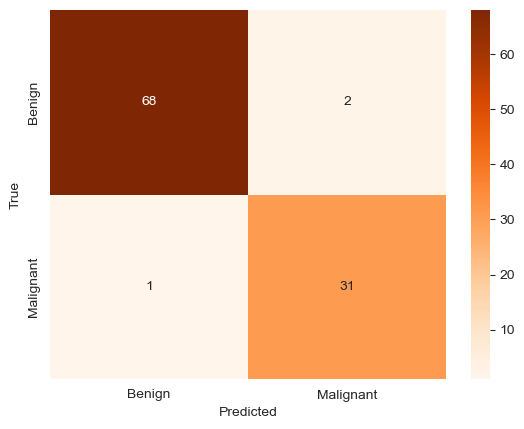

In [1119]:
evaluate_model(None, x_test_scaled, y_test, False, prediction)

# Sklearn AdaBoost

d:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9411764705882353
Precision: 0.90625
Recall: 0.90625
F1_Score: 0.90625


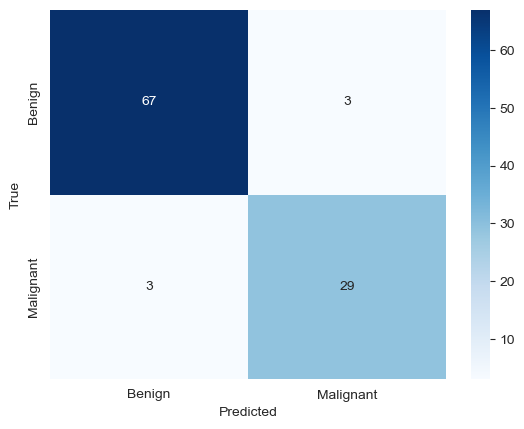

In [1120]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train_scaled, y_train)
evaluate_model(ada, x_test_scaled, y_test)